<center>
    <img src="https://i.ibb.co/wQg0qzq/Banner.png" width="900" alt="KCode Banner"  />
</center>
<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541991835800&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>




# Algoritmo de polinomial

Vamos utilizar um conjunto de dados referente à emissão de CO2 por automóveis
# Objetivo:
* Utilizar a bilioteca scikit-learn para implantar um modelo de regressão polinomial;
* Criar um modelo, treina-lo, testa-lo e utilizar.

### Importando bibliotecas necessárias

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Criando o DataFrame

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.drop(columns=['FUELCONSUMPTION_COMB_MPG'], inplace=True) # Excluindo coluna redundante
df.head() # Dando uma olhada no DataFrame



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


## Entendendo os dados

### `FuelConsumptionCo2.csv`:


Fizemos o download de um conjunto de dados, **`FuelConsuptionCo2.csv`**, de consumo de combustível, que contém consumo de combustível de modelos específicos e taxas estimadas de emissão de dioxido de carbono, para veículos leves novos à venda varejo no Canadá. [Fonte](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


*   **MODELYEAR** e.g. 2014 - **Ano do Modelo**
*   **MAKE** e.g. Acura - **Fabricante**
*   **MODEL** e.g. ILX - **Modelo**
*   **VEHICLE CLASS** e.g. SUV - **Classe do veículo**
*   **ENGINE SIZE** e.g. 4.7 - **Tamanho do motor**
*   **CYLINDERS** e.g 6 - **Número de cilindros**
*   **TRANSMISSION** e.g. A6 - Transmissão
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9 - **Consumo de combústivel L/100km na cidade**
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9 - **Consumo de combústivel L/100km na BR**
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2 - **Consumo de combústivel L/100km Combinado**
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low -->  - **Emissão de Co2** 

### Vamos separar algumas caractéristicas que nos queremos para a regressão:

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Vamos plotar os valores das emissão em relação ao tamanho do motor.

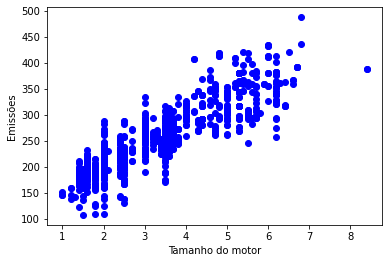

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='b')
plt.xlabel("Tamanho do motor")
plt.ylabel("Emissões")
plt.show()

#### Criando um modelo de treino e teste

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste.

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Regressão Polinomial


Às vezes, a tendência dos dados não é realmente linear e parece curvilínea. Neste caso, podemos usar métodos de regressão polinomial. Na verdade, existem muitas regressões diferentes que podem ser usadas para ajustar a aparência do conjunto de dados, como quadrático, cúbico e assim por diante, e pode continuar em graus infinitos.

Em essência, podemos chamar tudo isso de regressão polinomial, em que a relação entre a variável independente x e a variável dependente y é modelada como um polinômio de grau n em x. Digamos que você queira ter uma regressão polinomial (vamos fazer um polinômio de 2 graus):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Agora, a questão é: como podemos ajustar nossos dados nessa equação enquanto temos apenas valores x, como **Tamanho do motor**?
Bem, podemos criar alguns recursos adicionais: 1, $x$, and $x^2$.

**PolynomialFeatures()** função da biblioteca Scikit-learn, conduz um novo conjunto de recursos do conjunto de recursos original. Ou seja, será gerada uma matriz composta por todas as combinações polinomiais das características com grau menor ou igual ao grau especificado. Por exemplo, digamos que o conjunto de recursos original tenha apenas um recurso, *Tamanho do Motor*. Agora, se selecionarmos o grau do polinômio como 2, ele gerará 3 recursos, grau=0, grau=1 e grau=2:


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])


**fit_transform** pega nossos valores x e gera uma lista de nossos dados elevados da potência de 0 à potência de 2 

(já que definimos o grau de nosso polinômio como 2).


A equação e o exemplo de amostra são exibidos abaixo.

<img src="https://i.ibb.co/jGfD5fH/func.png.png" width="300" alt="Função"  />


conjunto de recursos para análise parece linear, certo? Sim, parece.
Na verdade, A regreesão  polinomial é um tipo especial de regressão linear. Apenas considere substituir $x$ por $x\_1$, $x\_1^2$ por $x\_2$ e assim por diante. 2º grau 2º grau em:

y = b + \teta\_1 x\_1 + \teta\_2 x\_2$$

Agora, podemos lidar com isso como um problema de 'regressão linear'. Portanto, este caso de regressão polinomial é considerado um caso especial da regressão linear múltipla tradicional. Portanto, você pode usar o mesmo mecanismo para resolver esses problemas.
Então podemos usar a função **LinearRegression()** para resolver isto:


In [9]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coeficientes: ',clf.coef_)
print ('Intersecção: ',clf.intercept_)


Coeficientes:  [[ 0.         48.69835582 -1.28356818]]
Intersecção:  [109.92849455]


Como mencionado anteriormente, **Coeficiente** e **Intercecção** , são os parâmetros da linha curva de ajuste.
Dado que se trata de uma regressão linear múltipla típica, com 3 parâmetros, e sabendo que os parâmetros são o intercepto e os coeficientes do hiperplano, sklearn os estimou a partir de nosso novo conjunto de conjuntos de recursos. Vamos plotar: